# Text Classification Using Machine Learning
I classified BBC news articles using [Support Vector Machines](https://en.wikipedia.org/wiki/Support-vector_machine) and [Multinomial Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Multinomial_na%C3%AFve_Bayes).
   
### Libaries that i use;
- numpy
- pandas
- seaborn
- matplotlib
- nltk
- sklearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

[Natural Language Toolkit or nltk](https://en.wikipedia.org/wiki/Natural_Language_Toolkit) is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language.
- **punkt**: This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.
- **stopwords**: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc.
- **wordnet**: The WordNet is a part of Python's Natural Language Toolkit. It is a large word database of English Nouns, Adjectives, Adverbs and Verbs.

We are commenting these because we already have these datasets. If you dont have these you should run these for first time.

      category                                               text
0            0  tv future in the hands of viewers with home th...
1            1  worldcom boss  left books alone  former worldc...
2            2  tigers wary of farrell  gamble  leicester say ...
3            2  yeading face newcastle in fa cup premiership s...
4            3  ocean s twelve raids box office ocean s twelve...
...        ...                                                ...
2220         1  cars pull down us retail figures us retail sal...
2221         4  kilroy unveils immigration policy ex-chatshow ...
2222         3  rem announce new glasgow concert us band rem h...
2223         4  how political squabbles snowball it s become c...
2224         2  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]


<AxesSubplot:xlabel='category', ylabel='count'>

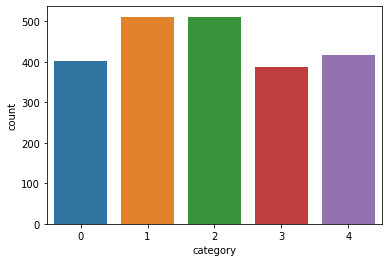

In [3]:
bbc= pd.read_csv("bbc-text.csv")
bbc.category = bbc.category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4})
print(bbc)
sns.countplot(x=bbc.category)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(bbc.text, bbc.category, test_size = 0.2, random_state = 1)

Dataset divied  as features and labels. Also splitted as %80 train and %20 test. Since we used random_state we can get the same train-test data always.

In [5]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

We created our custom class to tokenization an lemmatization process.

In [6]:
tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),
                                strip_accents = 'unicode', # works 
                                stop_words = 'english', # works
                                lowercase = True, # works
                                max_df = 0.5, # works
                                min_df = 10) # works

We are creating our CountVectorizer with our custom LemmaTokenizer and paramaters.
- Divide sentences into words
- Removed stop words, numbers, punctuation, special characters
- Lemmatization(Lemma means base form of a word.)

In [7]:
tf_vectorizer.fit(X_train)

c:\users\recep\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
c:\users\recep\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


CountVectorizer(max_df=0.5, min_df=10, stop_words='english',
                strip_accents='unicode',
                tokenizer=<__main__.LemmaTokenizer object at 0x0000013342234490>)

We trained our CountVectorizer with our training data.

In [8]:
X_transformed = tf_vectorizer.transform(X_train)
X_test_transformed = tf_vectorizer.transform(X_test)

We vectorized our training and test features.

In [9]:
accuracy={'MNB':0,'SVC':0}
precision={'MNB':0,'SVC':0}
f1={'MNB':0,'SVC':0}

We created these dictionaries for saving different classification metric scores.

In [10]:
clf_models={
            'MNB':MultinomialNB(),
            'SVC':SVC(decision_function_shape='ovo')
           }

We created our classifier.

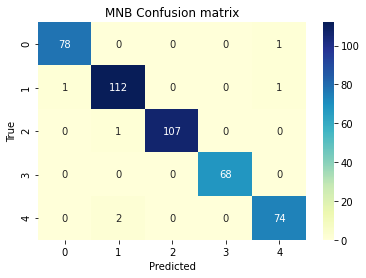

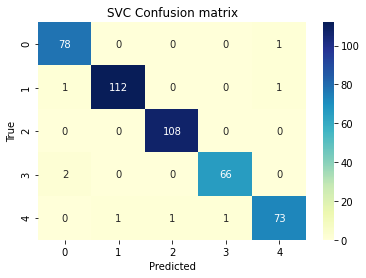

In [11]:
for key in clf_models.keys():
    clf=clf_models[key]
    clf.fit(X_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    
    cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
    labels = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("bottom")
    plt.title(key+' Confusion matrix')
    plt.ylabel('True')
    plt.xlabel('Predicted')

    accuracy[key]=metrics.accuracy_score(y_test,y_pred)
    precision[key]=metrics.precision_score(y_test,y_pred,average='macro')
    f1[key]=metrics.f1_score(y_test,y_pred,average='macro')
    print("")

We trained our different classifiers, calculated their classification metric scores and created our heatmaps.

In [12]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1 Score: ", f1)

Accuracy:  {'MNB': 0.9865168539325843, 'SVC': 0.9820224719101124}
Precision:  {'MNB': 0.986987805231295, 'SVC': 0.9806694107426477}
F1 Score:  {'MNB': 0.9869081517504291, 'SVC': 0.9803682082069216}


Printing different classification metric scores.

In [13]:
def Plot(p_metric,p_values):    
    columns=p_values.keys()
    values=list(p_values.values())
    y_pos = np.arange(len(columns))

    plt.bar(y_pos, values, align='center', alpha=0.5,color=["red","blue"])
    plt.xticks(y_pos, columns)
    title=p_metric+' Score'
    plt.title(title)
    
    plt.figtext(0.5, 0.001, str(p_values), ha="center", fontsize=16)
    plt.show()

Function to plot different metric scores.

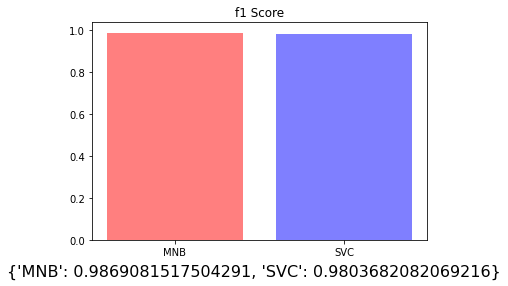

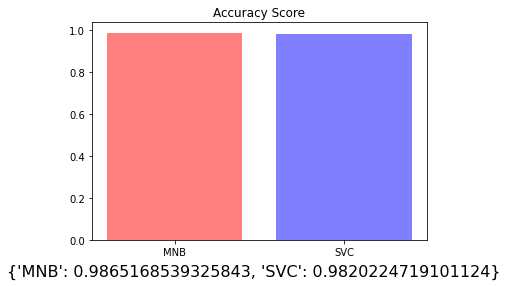

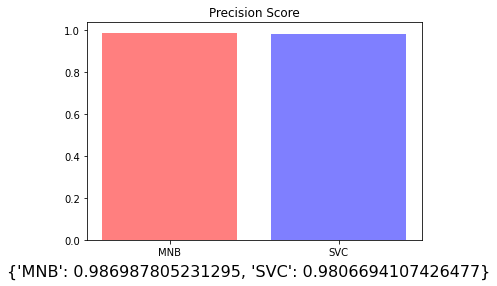

In [14]:
Plot("f1",f1)
Plot("Accuracy",accuracy)
Plot("Precision",precision)

As we can see above MNB gives us slightly better results.